# Text Analysis and Natural Language Processing (NLP)

This notebook serves as a quick tutorial for text analysis and natural language processing (NLP). The topics and techniques covered include the following :
- word tokenization, 
- stopwords, 
- part-of-speech tagging, 
- stemming, 
- lemmatization,
- named entity recognition,
- sentiment analysis.

In this tutorial, we'll be using the Natural Language Toolkit (NLTK) open source library available in python, more information about this library can be found here: https://www.nltk.org/. Other open source, natural language processing libraries exist such as spaCy, https://spacy.io/, or StanfordNLP now called Stanza, https://stanfordnlp.github.io/stanza/.

## Installing and Loading the Packages

NLTK can be installed using the pip command in the python shell. The package 'wordcloud' is also installed.

In [ ]:
!pip install nltk

In [ ]:
!pip install wordcloud

Load the packages to the workspace.

In [1]:
import nltk
import matplotlib.pyplot as plt

#Dowload collections from NTLK
#nltk.download()

To continue following the next steps, it is important to download various collections from NLTK. Simply run the above command 'nltk.download()' and select 'popular' and 'book'. This will download the most used collections such as 'stopwords' and 'twitter_samples', along with texts from various books (this will presented next).

Load all items from NLTK's book module. The book module stores text from several books.

In [3]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


We can load any of the above texts simply by entering theirs names.

## Counting Vocabulary

Counting items in a text: that is counting the number of words and punctuations that appear in a text.

In [4]:
#Counting the length (number of items) for text3

number_of_items = len(text3)
print('There are',number_of_items,'items in this text.')

There are 44764 items in this text.


Count the number of distinct items in the text.

In [4]:
#create a set of unique items in text3, and sort them in alphabetical order.
distinct_items = sorted(set(text3))
number_distinct = len(distinct_items)
print('There are',number_distinct,'distinct items in this text.')

There are 2789 distinct items in this text.


Given we have counted the total number of items in the text, and the number of unique items, we can calculate the lexical richness with a simple division. 

In [5]:
number_of_items/number_distinct

16.050197203298673

We can also focus on a specific word and calculate how much text is taken up by this word.
First and foremost, we'll return a subset of items in the text so we can select a word at random.

In [6]:
distinct_items[700:720]

['afraid',
 'after',
 'afterward',
 'afterwards',
 'aga',
 'again',
 'against',
 'age',
 'aileth',
 'air',
 'al',
 'alive',
 'all',
 'almon',
 'alo',
 'alone',
 'aloud',
 'also',
 'altar',
 'altogether']

For example we can select 'after' from the subset above, and proceed to calculate the percentage of text taken up by this word:

In [7]:
percentage_after = 100 * text3.count('after')/number_of_items
print('The percentage of text taken up by the word after is equal to',percentage_after,'%')

The percentage of text taken up by the word after is equal to 0.23903136448932177 %


Extending on this point, we can write a small algorithm to find the item with this highest percentage and return thus percentage. To do this we can iterate though all items in the next:

In [8]:
max_percentage = int()
max_item = str()
for item in distinct_items:
    item_percentage = 100 * text3.count(item)/number_of_items
    if item_percentage > max_percentage:
        max_percentage = item_percentage
        max_item = item
        
print('The item with the highest occurence in the text is:',max_item)
print('The percentage of text taken up by this item is equal to',max_percentage,'%')

The item with the highest occurence in the text is: ,
The percentage of text taken up by this item is equal to 8.223125726029846 %


However, we can simplify the previous precedure and use the built-in NLTK function 'FreqDist' to find the frequency of each item in the text.

In [9]:
freqdist_text3 = FreqDist(text3)
freqdist_text3

FreqDist({',': 3681, 'and': 2428, 'the': 2411, 'of': 1358, '.': 1315, 'And': 1250, 'his': 651, 'he': 648, 'to': 611, ';': 605, ...})

None of the words in the ouput above aren't actually informative. They're stopwords, that is they correspond to the most common words in a language such as grammatical conjunctions.

We can generate a cumulative count graph of the first 50 (frequent) words in the text.
Remember we counted 44764 items in this text, the graph shows us these 50 words account for over 55% (25000) of the book.

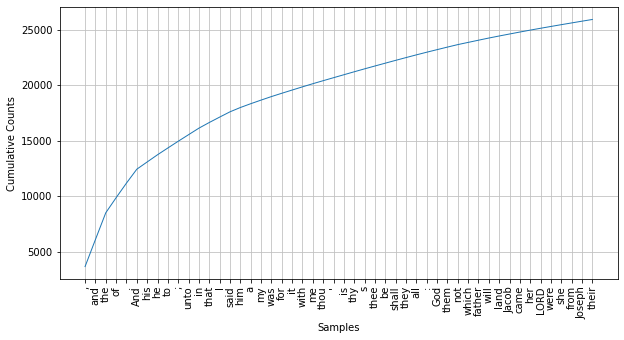

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [10]:
plt.figure(figsize=(10, 5))
freqdist_text3.plot(50, cumulative = True, linewidth = 1)

## Tokenization

An important first step in language processing is tokinization. This process breaks up raw text into smaller blocks which could words and punctation when applying word tokennization, or could be breaking text into sentences when applying sentence tokenization.

We'll first write a small text to work with and proceed to apply the techniques mentioned.

In [11]:
text_1 = "Hello, this is a NLP tutorial in Python. This jupyter notebook will cover various techniques such as word tokenization, stopwords, PoS tagging, and stemming among others. The NLTK package, developed by Steven Bird and Edward Loper, will be used."
len(text_1)

245

### Sentence Tokenization

NLTK has a function 'sent_tokenize' that allows us to break our text up into different sentences, as illustrated below.

In [12]:
from nltk.tokenize import sent_tokenize
tokenized_sentences = sent_tokenize(text_1)
print(tokenized_sentences)

['Hello, this is a NLP tutorial in Python.', 'This jupyter notebook will cover various techniques such as word tokenization, stopwords, PoS tagging, and stemming among others.', 'The NLTK package, developed by Steven Bird and Edward Loper, will be used.']


The function 'word_tokenize' on the other hand allows us to break the text into single items: words and punctuation.

In [13]:
from nltk.tokenize import word_tokenize
tokenized_words = word_tokenize(text_1)
print(tokenized_words)

['Hello', ',', 'this', 'is', 'a', 'NLP', 'tutorial', 'in', 'Python', '.', 'This', 'jupyter', 'notebook', 'will', 'cover', 'various', 'techniques', 'such', 'as', 'word', 'tokenization', ',', 'stopwords', ',', 'PoS', 'tagging', ',', 'and', 'stemming', 'among', 'others', '.', 'The', 'NLTK', 'package', ',', 'developed', 'by', 'Steven', 'Bird', 'and', 'Edward', 'Loper', ',', 'will', 'be', 'used', '.']


## Stop Words

Stopwords are high frequency words that are usually filtered when processing text. The reason these words are filtered out, is that they provide little lexical and informative content. As mentioned previously, this concerns mainly logical connectives such as 'and', 'if', 'so', 'but'.

There exists a corpus of stopwords in NLTK that allows us to filter our text, as illustrated below.

In [14]:
from nltk.corpus import stopwords
stopWords = stopwords.words("english")
keyWords = [i for i in tokenized_words if not i.lower() in stopWords]
sent_keyWords = ' '.join([j for j in keyWords])
print(keyWords)
print(sent_keyWords)

['Hello', ',', 'NLP', 'tutorial', 'Python', '.', 'This', 'jupyter', 'notebook', 'cover', 'various', 'techniques', 'word', 'tokenization', ',', 'stopwords', ',', 'PoS', 'tagging', ',', 'stemming', 'among', 'others', '.', 'The', 'NLTK', 'package', ',', 'developed', 'Steven', 'Bird', 'Edward', 'Loper', ',', 'used', '.']
Hello , NLP tutorial Python . This jupyter notebook cover various techniques word tokenization , stopwords , PoS tagging , stemming among others . The NLTK package , developed Steven Bird Edward Loper , used .


## Stemming

Stemming is the process of stripping off affixes, and/or reduce a word to their root word. An example of stemming is given below.

In [14]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
example = ['transforming', 'transformation']
stem_example = [stemmer.stem(j) for j in example]
print(stem_example)

['transform', 'transform']


Transformation and transforming reduce to 'transform' when applying stemming.

We'll apply stemming to the text we wrote earlier. However, the output shows that this technique doesn't always work efficiently.

In [15]:
stemWords = [stemmer.stem(j) for j in keyWords]
print(stemWords)

['hello', ',', 'nlp', 'tutori', 'python', '.', 'thi', 'jupyt', 'notebook', 'cover', 'variou', 'techniqu', 'word', 'token', ',', 'stopword', ',', 'po', 'tag', ',', 'stem', 'among', 'other', '.', 'the', 'nltk', 'packag', ',', 'develop', 'steven', 'bird', 'edward', 'loper', ',', 'use', '.']


## Lemmatization

Lemmatization reduces a word to its base word, and brings context to a word. A basic example is the word 'better' is reduced to 'good' when lemmatization is applied.

In [16]:
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
lemWords = [lem.lemmatize(i, pos='v') for i in keyWords]
print(lemWords)

['Hello', ',', 'NLP', 'tutorial', 'Python', '.', 'This', 'jupyter', 'notebook', 'cover', 'various', 'techniques', 'word', 'tokenization', ',', 'stopwords', ',', 'PoS', 'tag', ',', 'stem', 'among', 'others', '.', 'The', 'NLTK', 'package', ',', 'develop', 'Steven', 'Bird', 'Edward', 'Loper', ',', 'use', '.']


## Part-of-speech Tagging

Part of speech tagging is used to identify the grammatical groups of words, such as nouns, verbs, adjectives, adverbs..

In [17]:
posTagging = nltk.pos_tag(tokenized_words)
print(posTagging)

[('Hello', 'NNP'), (',', ','), ('this', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('NLP', 'NNP'), ('tutorial', 'NN'), ('in', 'IN'), ('Python', 'NNP'), ('.', '.'), ('This', 'DT'), ('jupyter', 'NN'), ('notebook', 'NN'), ('will', 'MD'), ('cover', 'VB'), ('various', 'JJ'), ('techniques', 'NNS'), ('such', 'JJ'), ('as', 'IN'), ('word', 'NN'), ('tokenization', 'NN'), (',', ','), ('stopwords', 'NNS'), (',', ','), ('PoS', 'NNP'), ('tagging', 'NN'), (',', ','), ('and', 'CC'), ('stemming', 'VBG'), ('among', 'IN'), ('others', 'NNS'), ('.', '.'), ('The', 'DT'), ('NLTK', 'NNP'), ('package', 'NN'), (',', ','), ('developed', 'VBN'), ('by', 'IN'), ('Steven', 'NNP'), ('Bird', 'NNP'), ('and', 'CC'), ('Edward', 'NNP'), ('Loper', 'NNP'), (',', ','), ('will', 'MD'), ('be', 'VB'), ('used', 'VBN'), ('.', '.')]


## Named Entity Recognition

Named entity recognition is the process of identifying nouns that refer to named entities, that is to specific types of individuals such as a person, an organisation, and a location among others.

In [18]:
from nltk import ne_chunk
ner = ne_chunk(posTagging)
print(ner)

(S
  (GPE Hello/NNP)
  ,/,
  this/DT
  is/VBZ
  a/DT
  (ORGANIZATION NLP/NNP)
  tutorial/NN
  in/IN
  (GPE Python/NNP)
  ./.
  This/DT
  jupyter/NN
  notebook/NN
  will/MD
  cover/VB
  various/JJ
  techniques/NNS
  such/JJ
  as/IN
  word/NN
  tokenization/NN
  ,/,
  stopwords/NNS
  ,/,
  (ORGANIZATION PoS/NNP)
  tagging/NN
  ,/,
  and/CC
  stemming/VBG
  among/IN
  others/NNS
  ./.
  The/DT
  (ORGANIZATION NLTK/NNP)
  package/NN
  ,/,
  developed/VBN
  by/IN
  (PERSON Steven/NNP Bird/NNP)
  and/CC
  (PERSON Edward/NNP Loper/NNP)
  ,/,
  will/MD
  be/VB
  used/VBN
  ./.)


In our text, we have the names of two people: Steven Bird and Edward Loper. NER is used to find this information; the short algorithm below identifies and outputs the names of persons mentioned in the text.

In [19]:
persons = []
for j in ner:
    if hasattr(j, 'label'):
        if j.label() == 'PERSON':
            persons.append([i[0] for i in j])
persons

[['Steven', 'Bird'], ['Edward', 'Loper']]

## Word Cloud

A popular visualisation tool used in NLP is wordcloud. Words are depicted according to their weight in the text, so words with a higher weight are larger. Two examples are show below.

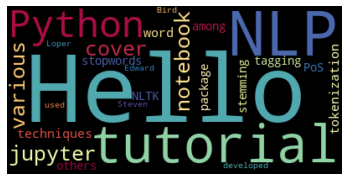

In [36]:
from wordcloud import WordCloud
wordcloud = WordCloud(stopwords = stopWords, colormap = 'Spectral').generate(text_1)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

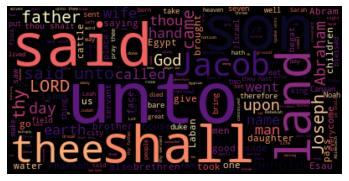

In [35]:
text_3 = ' '.join(i for i in text3)
wordcloud = WordCloud(stopwords=stopWords, colormap = 'magma').generate(text_3)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Sentiment Analysis

### Import Packages

In [2]:
from nltk.corpus import twitter_samples
import pandas as pd
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

### Create DataFrame

We can create a simple dataframe using the twitter samples from the NTLK corpus.

In [3]:
documents = ([(t, "1") for t in twitter_samples.strings("positive_tweets.json")] + 
             [(t, "0") for t in twitter_samples.strings("negative_tweets.json")])
df_documents = pd.DataFrame(documents)
df_documents = df_documents.rename(columns = {0: 'tweet', 1: 'label'})
df_documents.head()

,tweet,label
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1
1,@Lamb2ja Hey James! How odd :/ Please call our...,1
2,@DespiteOfficial we had a listen last night :)...,1
3,@97sides CONGRATS :),1
4,yeaaaah yippppy!!! my accnt verified rqst has...,1


In [ ]:
df_document.loc[0,'tweet']

We notice however that the tweets contain various characters, hashtags and user names. It is therefore important we process these tweets and transform then into 'clean' text.

### Processing the Tweets

Let's start by removing the usernames in the tweets. The usernames won't have an impact of the sentiment of a tweet, they simply indicate to whom the tweet is directed to.

In [4]:
import re
def remove_users(tweet):
    """Function to remove twitter usernames."""
    removeUsername = re.sub('(?<=^|(?<=[^a-zA-Z0-9-\.]))@([A-Za-z0-9_]+)','',tweet)
    cleanTweet = ' '.join(removeUsername.split())
    return cleanTweet

print(remove_users(df_documents.loc[0,'tweet']))

#FollowFriday for being top engaged members in my community this week :)


Here, we'll create a simple function allowing us to remove any punctuation we may find in a tweet. This function will remove the hashtags aswell.

In [5]:
import string
def remove_punctuation(tweet):
    """Function to remove punctuation in a tweet."""
    removed_punc = tweet.translate(str.maketrans("","", string.punctuation))
    return removed_punc

print(remove_punctuation(df_documents.loc[0,'tweet']))

FollowFriday FranceInte PKuchly57 MilipolParis for being top engaged members in my community this week 


Alternative method for removing punctuation using TextBlob. Works just as well as the previous method.

In [6]:
from textblob import TextBlob
tblb = TextBlob(df_documents.loc[0,'tweet'])
tblb.words

WordList(['FollowFriday', 'France_Inte', 'PKuchly57', 'Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week'])

As mentioned earlier in this tutorial, stopwords don't offer any information content. Stopwords are therfore removed with the following function.

In [7]:
def remove_stopwords(tweet):
    """Function to remove stopwords."""
    stopWords = stopwords.words("english")
    no_stopwords = [i.lower() for i in word_tokenize(tweet) if not i.lower() in stopWords]
    return no_stopwords

no_users = remove_users(df_documents.loc[0,'tweet'])
no_punctuation = remove_punctuation(no_users)
print(remove_stopwords(no_punctuation))

['followfriday', 'top', 'engaged', 'members', 'community', 'week']


Various words may differ, but will have the same meaning. Thus for consistency purposes and to normalize the tweets, we apply the lemmatization technique previously described.  

In [8]:
def lemmatize_tweet(cleanTweet):
    """Function to reduce words to their base word."""
    lem = WordNetLemmatizer()
    lemmatized_words = [lem.lemmatize(i, pos='v') for i in cleanTweet]
    return lemmatized_words

cleaned_tweet = remove_stopwords(no_punctuation)
print(lemmatize_tweet(cleaned_tweet))

['followfriday', 'top', 'engage', 'members', 'community', 'week']


Once these processing functions defined we can apply them to complete data set of tweets.

In [9]:
for row in range(0, len(df_documents)):
    no_users = remove_users(df_documents.loc[row,'tweet'])
    no_punctuation = remove_punctuation(no_users)
    cleaned_tweet = remove_stopwords(no_punctuation)
    lem_tweet = lemmatize_tweet(cleaned_tweet)
    df_documents.loc[row,'tweet'] = lem_tweet

df_documents.head()

,tweet,label
0,"[followfriday, top, engage, members, community...",1
1,"[hey, jam, odd, please, call, contact, centre,...",1
2,"[listen, last, night, bleed, amaze, track, sco...",1
3,[congrats],1
4,"[yeaaaah, yippppy, accnt, verify, rqst, succee...",1


This can be simplified with a general 'processing' function that will encompass the various defined functions.

In [21]:
def processing(tweet):
    
    def remove_users(tweet):
        """Function to remove twitter usernames."""
        removeUsername = re.sub('(?<=^|(?<=[^a-zA-Z0-9-\.]))@([A-Za-z0-9_]+)','',tweet)
        cleanTweet = ' '.join(removeUsername.split())
        return cleanTweet

    def remove_punctuation(tweet):
        """Function to remove punctuation in a tweet."""
        removed_punc = tweet.translate(str.maketrans("","", string.punctuation))
        return removed_punc

    def remove_stopwords(tweet):
        """Function to remove stopwords."""
        stopWords = stopwords.words("english")
        no_stopwords = [i.lower() for i in word_tokenize(tweet) if not i.lower() in stopWords]
        return no_stopwords

    def lemmatize_tweet(cleanTweet):
        """Function to reduce words to their base word."""
        lem = WordNetLemmatizer()
        lemmatized_words = [lem.lemmatize(i, pos='v') for i in cleanTweet]
        return lemmatized_words
    
    removed_users = remove_users(tweet)
    removed_punctuation = remove_punctuation(removed_users)
    removed_stopwords = remove_stopwords(removed_punctuation)
    cleaned_tweet = lemmatize_tweet(removed_stopwords)
    
    return cleaned_tweet

Construct a pipeline to perform classification.

In [22]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=processing)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [19]:
for i in range(0, len(df_documents)):
    df_documents.loc[i, 'tweet'] = ' '.join(df_documents.loc[i, 'tweet'])

Split the data:
- Training set,
- Test set.

Train the pipeline on the training set, and measure the accuracy of this model with the test set.
Various accuracy measurements are demonstrated, such as the confusion matrix which states the predictive error for each target/class.

In [23]:
tweet_train, tweet_test, label_train, label_test = train_test_split(df_documents['tweet'], df_documents['label'], test_size=0.2)
pipeline.fit(tweet_train,label_train)
predictions = pipeline.predict(tweet_test)
print(classification_report(predictions,label_test))
print(confusion_matrix(predictions,label_test))
print(accuracy_score(predictions,label_test))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78      1096
           1       0.72      0.80      0.76       904

    accuracy                           0.77      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.77      0.77      0.77      2000

[[813 283]
 [184 720]]
0.7665
